In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import time
import json
import requests
from datetime import datetime
import pandas as pd
import numpy as np

In [3]:
def catch_data():
    url='https://view.inews.qq.com/g2/getOnsInfo?name=disease_h5'
    reponse = requests.get(url=url).json()
    #返回数据字典
    data = json.loads(reponse['data'])
    return data

In [4]:
data = catch_data()
data.keys()
lastUpdateTime = data['lastUpdateTime']
# 数据明细，数据结构比较复杂，一步一步打印出来看，先明白数据结构
areaTree = data['areaTree']

In [5]:
# 国内数据
china_data = areaTree[0]['children']
china_list = []
for a in range(len(china_data)):
    province = china_data[a]['name']
    province_list = china_data[a]['children']
    for b in range(len(province_list)):
        city = province_list[b]['name']
        total = province_list[b]['total']
        today = province_list[b]['today']
        china_dict = {}
        china_dict['province'] = province
        china_dict['city'] = city
        china_dict['total'] = total
        china_dict['today'] = today
        china_list.append(china_dict)

In [6]:
china_data = pd.DataFrame(china_list)
china_data.head()

,province,city,total,today
0,台湾,地区待确认,"{'nowConfirm': 2234, 'confirm': 16826, 'suspec...","{'confirm': 21, 'confirmCuts': 0, 'isUpdated':..."
1,浙江,绍兴,"{'nowConfirm': 383, 'confirm': 425, 'suspect':...","{'confirm': 8, 'confirmCuts': 0, 'isUpdated': ..."
2,浙江,宁波,"{'nowConfirm': 73, 'confirm': 231, 'suspect': ...","{'confirm': 0, 'confirmCuts': 0, 'isUpdated': ..."
3,浙江,杭州,"{'nowConfirm': 32, 'confirm': 213, 'suspect': ...","{'confirm': 0, 'confirmCuts': 0, 'isUpdated': ..."
4,浙江,境外输入,"{'nowConfirm': 22, 'confirm': 290, 'suspect': ...","{'confirm': 3, 'confirmCuts': 0, 'isUpdated': ..."


In [7]:
# 定义数据处理函数
def confirm(x):
    confirm = eval(str(x))['confirm']
    return confirm

def dead(x):
    dead = eval(str(x))['dead']
    return dead

def heal(x):
    heal = eval(str(x))['heal']
    return heal

In [8]:
# 函数映射
china_data['confirm'] = china_data['total'].map(confirm)
china_data['dead'] = china_data['total'].map(dead)
china_data['heal'] = china_data['total'].map(heal)
china_data = china_data[["province","city","confirm","dead","heal"]]
china_data.head()
area_data = china_data.groupby("province")["confirm"].sum().reset_index()
area_data.column=["province","confirm"]
# print(area_data)
area_data.to_csv("confirm.csv", encoding="utf_8_sig")
area_data = china_data.groupby("province")["dead"].sum().reset_index()
area_data.column=["province","dead"]
# print(area_data)
area_data.to_csv("dead.csv", encoding="utf_8_sig")
area_data = china_data.groupby("province")["heal"].sum().reset_index()
area_data.column=["province","heal"]
# print(area_data)
area_data.to_csv("heal.csv", encoding="utf_8_sig")

In [9]:
import requests
import pandas as pd
class SpiderRumor(object):
    def __init__(self):
        self.url = "https://vp.fact.qq.com/loadmore?artnum=0&page=%s"
        self.header = {
            "User-Agent": "Mozilla/5.0 (iPhone; CPU iPhone OS 11_0 like Mac OS X) AppleWebKit/604.1.38 (KHTML, like Gecko) Version/11.0 Mobile/15A372 Safari/604.1",
        }
    def spider_run(self):
        df_all = list()
        for url in [self.url % i for i in range(61)]:
            data_list = requests.get(url, headers=self.header).json()["content"]
            temp_data = [[df["title"], df["date"], df["result"], df["explain"], df["tag"]] for df in data_list]
            df_all.extend(temp_data)
#             print(temp_data[0])
        print("df_all",df_all)
        pd.DataFrame(df_all, columns=["title", "date", "result", "explain", "tag"]).to_csv("冠状病毒谣言数据.csv", encoding="utf_8_sig")

In [10]:
if __name__ == '__main__':
    spider = SpiderRumor()
    spider.spider_run()

df_all []


In [24]:
requests.get("https://vp.fact.qq.com/home?page=%s")

<Response [200]>

In [22]:
import requests
import pandas as pd
class SpiderRumor(object):
    def __init__(self):
        self.url = "https://vp.fact.qq.com/home?page=%s"
        self.header = {
            "User-Agent": "Mozilla/5.0 (iPhone; CPU iPhone OS 11_0 like Mac OS X) AppleWebKit/604.1.38 (KHTML, like Gecko) Version/11.0 Mobile/15A372 Safari/604.1",
        }
    def spider_run(self):
        df_all = list()
        for url in [self.url % i for i in range(30)]:
            data_list = requests.get(url, headers=self.header).json()["content"]
            temp_data = [[df["title"], df["date"], df["result"], df["explain"], df["tag"]] for df in data_list]
            df_all.extend(temp_data)
#             print(temp_data[0])
        pd.DataFrame(df_all, columns=["title", "date", "result", "explain", "tag"]).to_csv("冠状病毒谣言数据.csv", encoding="utf_8_sig")
if __name__ == '__main__':
    spider = SpiderRumor()
    spider.spider_run()

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

## 折线图

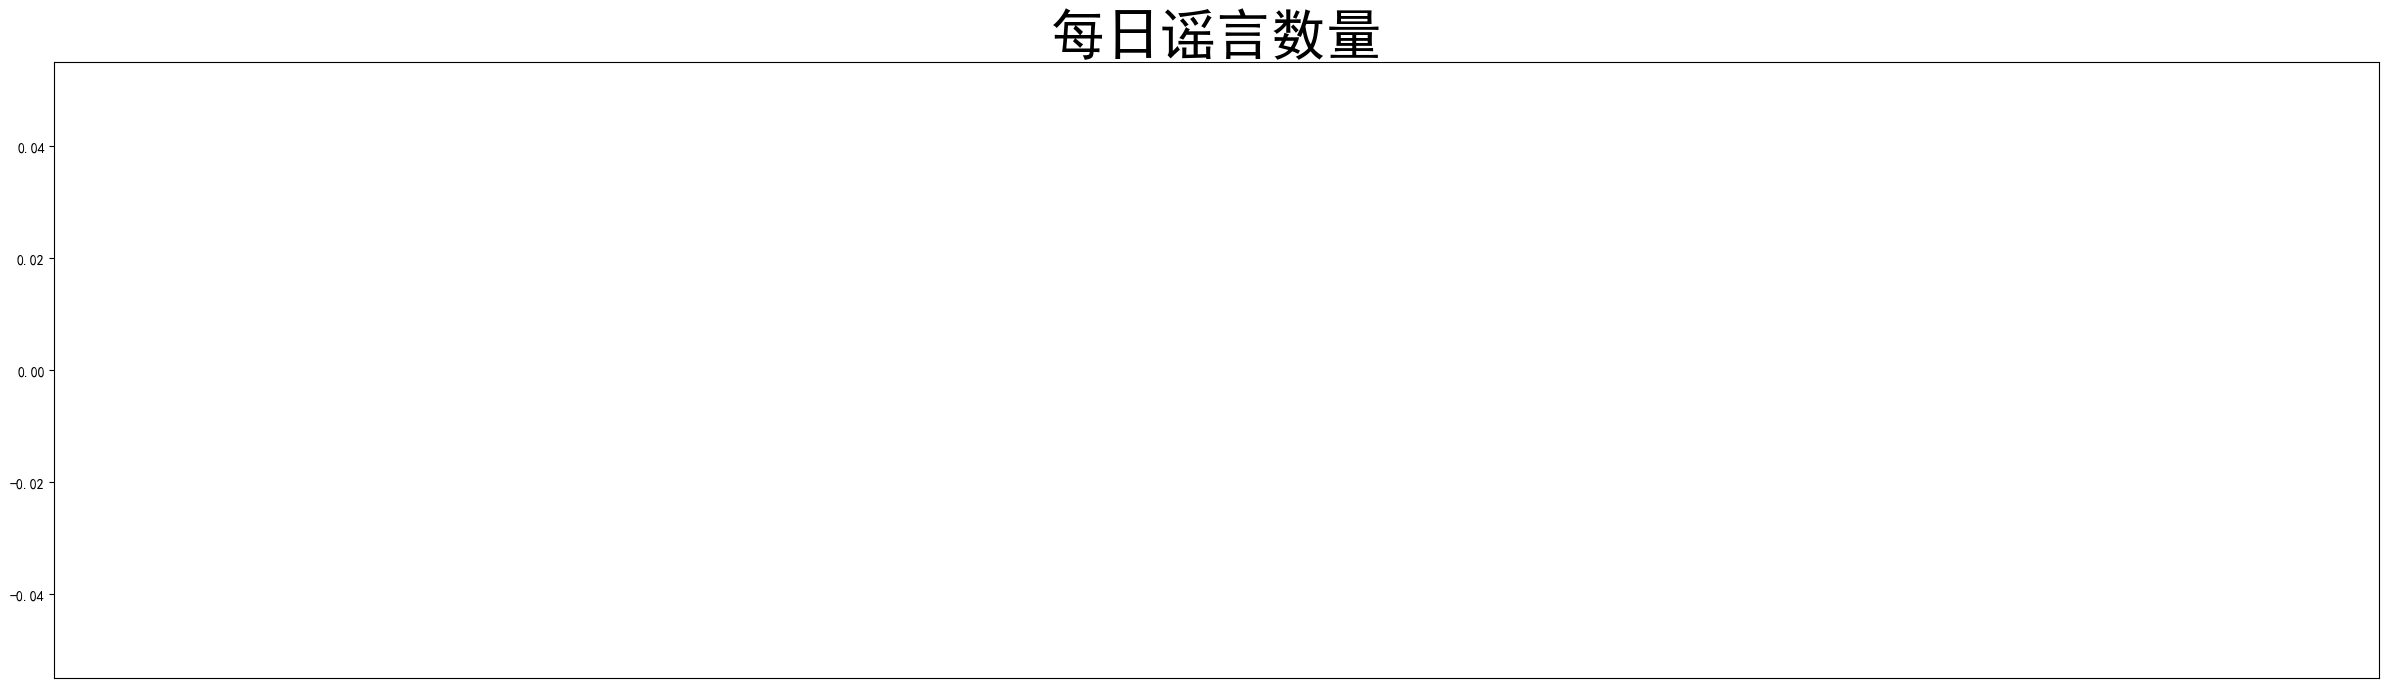

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Windows系统设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
data = pd.read_csv('冠状病毒谣言数据.csv')
labels = data['date'].value_counts().index.tolist()
sizes = data['date'].value_counts().values.tolist()
plt.figure(figsize=(30, 8))
plt.plot(labels, sizes)
plt.xticks(labels, labels, rotation=45)
plt.title('每日谣言数量', fontsize=40)
plt.show()